# 2018-09-18 - Rappels sur pandas et maplotlib

Manipulation de données autour du jeu des passagers du Titanic qu'on peut récupérer sur [opendatasoft](https://public.opendatasoft.com/explore/dataset/titanic-passengers/?flg=fr) ou [awesome-public-datasets](https://github.com/awesomedata/awesome-public-datasets/tree/master/Datasets).

In [1]:
import pandas

In [2]:
df = pandas.read_csv("titanic.csv/titanic.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
subset = df[ ["PassengerId", "Survived", "Pclass"]   ]
subset.head(n=2)

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1


In [6]:
survived = subset[ ["Survived", "Pclass"] ].groupby(["Pclass"]).sum()
compte = subset[ ["Survived", "Pclass"] ].groupby(["Pclass"]).count()
compte.columns = ['total']

In [7]:
survived

,Survived
Pclass,
1,136
2,87
3,119


In [8]:
compte

,total
Pclass,
1,216
2,184
3,491


In [9]:
jointure = survived.join(compte)
jointure

,Survived,total
Pclass,,
1,136,216
2,87,184
3,119,491


In [10]:
jointure["survie"] = jointure['Survived'] / jointure.total
jointure

,Survived,total,survie
Pclass,,,
1,136,216,0.629630
2,87,184,0.472826
3,119,491,0.242363


In [11]:
%matplotlib inline

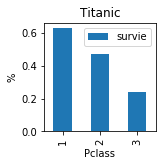

In [12]:
ax = jointure[['survie']].plot(kind="bar", figsize=(2, 2))
ax.set_title("Titanic")
ax.set_ylabel("%");

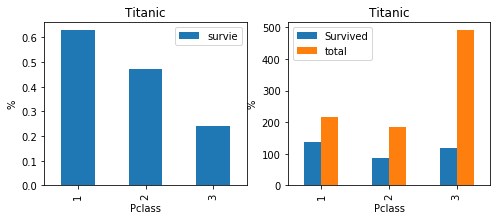

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8,3))
jointure[['survie']].plot(kind="bar", ax=ax[0])
ax[0].set_title("Titanic")
ax[0].set_ylabel("%");
jointure.drop('survie', axis=1).plot(kind="bar", ax=ax[1])
ax[1].set_title("Titanic")
ax[1].set_ylabel("%");

In [14]:
jointure.to_excel("titanic.xlsx")

In [15]:
df.head(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [16]:
mat = df[['Survived', 'Age']].values

In [17]:
mat.T

array([[ 0.,  1.,  1., ...,  0.,  1.,  0.],
       [22., 38., 26., ..., nan, 26., 32.]])

In [18]:
mat.T @ mat

array([[342.,  nan],
       [ nan,  nan]])

In [19]:
mat @ mat.T

array([[ 484.,  836.,  572., ...,   nan,  572.,  704.],
       [ 836., 1445.,  989., ...,   nan,  989., 1216.],
       [ 572.,  989.,  677., ...,   nan,  677.,  832.],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 572.,  989.,  677., ...,   nan,  677.,  832.],
       [ 704., 1216.,  832., ...,   nan,  832., 1024.]])

In [20]:
df.tail(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [21]:
names = list(df['Name'])
names
nom = names[0]
nom

'Braund, Mr. Owen Harris'

In [22]:
nom.split(',')[1].split('.')[0].strip().lower()

'mr'

In [23]:
mr = []
for nom in names:
    mr.append(nom.split(',')[1].split('.')[0].strip().lower())

In [24]:
df['mr'] = mr

In [25]:
gr = df[ ['Sex', "mr", "PassengerId"] ].groupby(['Sex', "mr"], as_index=False).count()

In [26]:
gr.head()

,Sex,mr,PassengerId
0,female,dr,1
1,female,lady,1
2,female,miss,182
3,female,mlle,2
4,female,mme,1


In [27]:
gr.pivot("mr", "Sex", "PassengerId")

Sex,female,male
mr,,
capt,NaN,1.0
col,NaN,2.0
don,NaN,1.0
dr,1.0,6.0
jonkheer,NaN,1.0
lady,1.0,NaN
major,NaN,2.0
master,NaN,40.0
miss,182.0,NaN
